<a href="https://colab.research.google.com/github/TheeBright/MovieLens_dataset/blob/main/MovieLens_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
links = pd.read_csv('/content/links.csv')
tags = pd.read_csv('/content/tags.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
#merge ratings with movies and convert timestamp to datetime for this analysis
df = ratings.merge(movies, on='movieId', how='left')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [ ]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


In [ ]:
df.duplicated().sum()

np.int64(0)

### Additional Features to the dataset

In [ ]:
#extract the release year of each movie
df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0


In [ ]:
#calculate movie age from time of release till present year which is 2025
df['movie_age'] = 2025 - df['release_year']
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,movie_age
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,30.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,30.0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,30.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,30.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,30.0


In [ ]:
#calculate number of genre per movie
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')))
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,movie_age,num_genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,30.0,5
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,30.0,2
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,30.0,3
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,30.0,2
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,30.0,3


In [ ]:
#select the main genre
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0])
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,movie_age,num_genres,main_genre
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,30.0,5,Adventure
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,30.0,2,Comedy
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,30.0,3,Action
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,30.0,2,Mystery
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,30.0,3,Crime


In [ ]:
#calculate average rating for each movie
movie_avg = df.groupby('movieId')['rating'].mean().round(1).rename('avg_movie_rating')
df = df.merge(movie_avg, on='movieId', how='left')
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,movie_age,num_genres,main_genre,avg_movie_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,30.0,5,Adventure,3.9
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,30.0,2,Comedy,3.3
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,30.0,3,Action,3.9
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,30.0,2,Mystery,4.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,30.0,3,Crime,4.2


In [ ]:
#calculate average rating per user
user_avg = df.groupby('userId')['rating'].mean().round(1).rename('user_avg_rating')
df = df.merge(user_avg, on='userId', how='left')
df.head()


,userId,movieId,rating,timestamp,title,genres,release_year,movie_age,num_genres,main_genre,avg_movie_rating,user_avg_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,30.0,5,Adventure,3.9,4.4
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,30.0,2,Comedy,3.3,4.4
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,30.0,3,Action,3.9,4.4
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,30.0,2,Mystery,4.0,4.4
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,30.0,3,Crime,4.2,4.4


In [ ]:
#calculate rating counts per movie
count_ratings = df.groupby('movieId')['rating'].count().rename('num_ratings')
df = df.merge(count_ratings, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,movie_age,num_genres,main_genre,avg_movie_rating,user_avg_rating,num_ratings
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,30.0,5,Adventure,3.9,4.4,215
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,30.0,2,Comedy,3.3,4.4,52
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,30.0,3,Action,3.9,4.4,102
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,30.0,2,Mystery,4.0,4.4,203
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,30.0,3,Crime,4.2,4.4,204


In [ ]:
df[df.isnull().any(axis=1)]

,userId,movieId,rating,timestamp,title,genres,release_year,movie_age,num_genres,main_genre,avg_movie_rating,user_avg_rating,num_ratings
9147,62,176601,5.0,2018-05-08 16:00:52,Black Mirror,(no genres listed),NaN,NaN,1,(no genres listed),5.0,4.1,1
16886,105,147250,5.0,2018-05-13 10:29:14,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN,NaN,1,(no genres listed),5.0,4.1,1
16913,105,171749,5.0,2018-05-13 10:29:25,Death Note: Desu nôto (2006–2007),(no genres listed),NaN,NaN,1,(no genres listed),5.0,4.1,1
17879,111,171631,1.0,2018-01-31 23:21:49,Maria Bamford: Old Baby,(no genres listed),NaN,NaN,1,(no genres listed),1.0,3.3,1
17881,111,171891,3.5,2018-01-31 23:09:59,Generation Iron 2,(no genres listed),NaN,NaN,1,(no genres listed),3.5,3.3,1
30039,209,140956,3.5,2018-04-23 22:23:59,Ready Player One,Action|Sci-Fi|Thriller,NaN,NaN,3,Action,3.5,4.2,4
30090,210,40697,4.0,2018-05-25 16:36:31,Babylon 5,Sci-Fi,NaN,NaN,1,Sci-Fi,2.2,4.1,2
46593,305,140956,4.5,2018-07-31 13:26:17,Ready Player One,Action|Sci-Fi|Thriller,NaN,NaN,3,Action,3.5,3.9,4
46711,306,149334,3.0,2018-02-11 20:19:32,Nocturnal Animals,Drama|Thriller,NaN,NaN,2,Drama,3.0,3.3,1
49851,318,171495,5.0,2018-01-24 20:40:06,Cosmos,(no genres listed),NaN,NaN,1,(no genres listed),4.5,3.8,2


In [ ]:
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
release_year,18
movie_age,18
num_genres,0
main_genre,0


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100818 entries, 0 to 100835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            100818 non-null  int64         
 1   movieId           100818 non-null  int64         
 2   rating            100818 non-null  float64       
 3   timestamp         100818 non-null  datetime64[ns]
 4   title             100818 non-null  object        
 5   genres            100818 non-null  object        
 6   release_year      100818 non-null  float64       
 7   movie_age         100818 non-null  float64       
 8   num_genres        100818 non-null  int64         
 9   main_genre        100818 non-null  object        
 10  avg_movie_rating  100818 non-null  float64       
 11  user_avg_rating   100818 non-null  float64       
 12  num_ratings       100818 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usa

### Exploratory Data Analysis

In [ ]:
#Dataset overview
print(f"Total Ratings: {len(df)}")
print(f"Unique Movies: {df['movieId'].nunique()}")
print(f"Unique Users: {df['userId'].nunique()}")
print(f"Average Rating: {df['rating'].mean():.2f}")
df.info()


Total Ratings: 100818
Unique Movies: 9711
Unique Users: 610
Average Rating: 3.50
<class 'pandas.core.frame.DataFrame'>
Index: 100818 entries, 0 to 100835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userId            100818 non-null  int64         
 1   movieId           100818 non-null  int64         
 2   rating            100818 non-null  float64       
 3   timestamp         100818 non-null  datetime64[ns]
 4   title             100818 non-null  object        
 5   genres            100818 non-null  object        
 6   release_year      100818 non-null  float64       
 7   movie_age         100818 non-null  float64       
 8   num_genres        100818 non-null  int64         
 9   main_genre        100818 non-null  object        
 10  avg_movie_rating  100818 non-null  float64       
 11  user_avg_rating   100818 non-null  float64       
 12  num_ratings       100818 non-null  int

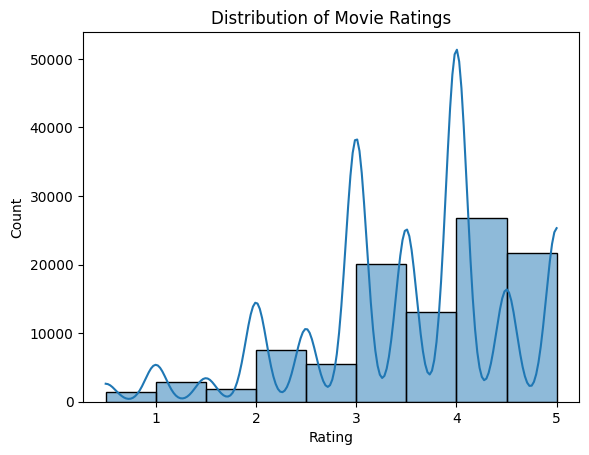

In [ ]:
# @title
#movie rating distibution
sns.histplot(df['rating'], bins=9, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-217071704.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='num_ratings', y='title', palette='magma')


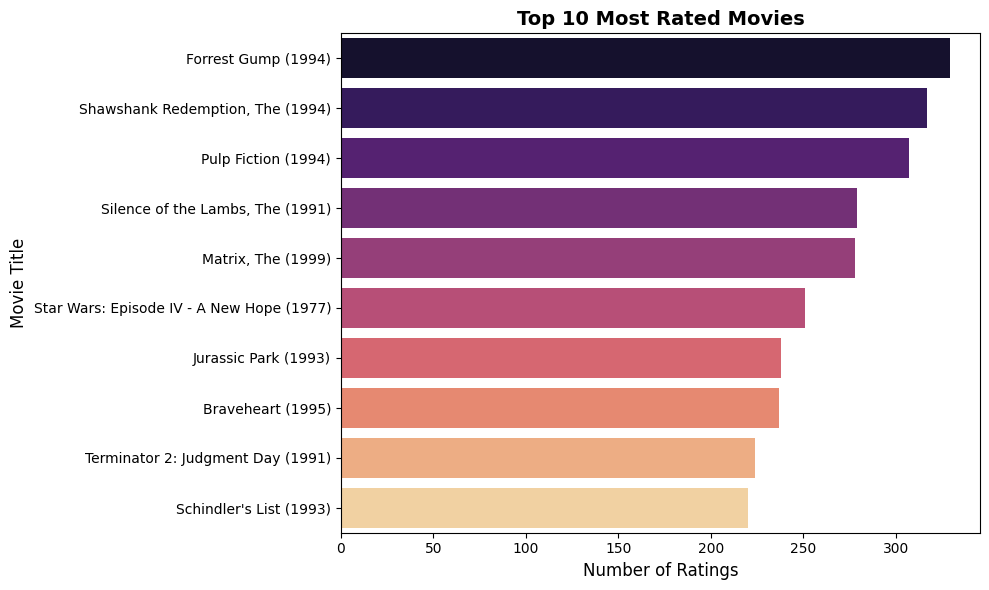

,title,num_ratings
20,Forrest Gump (1994),329
232,"Shawshank Redemption, The (1994)",317
16,Pulp Fiction (1994),307
34,"Silence of the Lambs, The (1991)",279
166,"Matrix, The (1999)",278
15,Star Wars: Episode IV - A New Hope (1977),251
26,Jurassic Park (1993),238
7,Braveheart (1995),237
552,Terminator 2: Judgment Day (1991),224
28,Schindler's List (1993),220


In [ ]:
#top 10 most rated movies
top_movies = (df[['title', 'num_ratings']].drop_duplicates(subset='title')
.sort_values(by='num_ratings', ascending=False).head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x='num_ratings', y='title', palette='magma')
plt.title('Top 10 Most Rated Movies', fontsize=14, weight='bold')
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.tight_layout()
plt.show()
top_movies


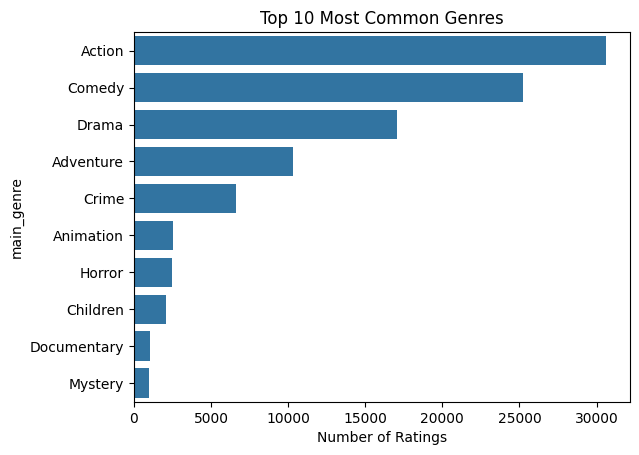

,count
main_genre,
Action,30631
Comedy,25217
Drama,17066
Adventure,10344
Crime,6610
Animation,2549
Horror,2461
Children,2097
Documentary,1015


In [ ]:
#most popular genre
genre_counts = df['main_genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Ratings')
plt.show()
genre_counts



/tmp/ipython-input-3369302794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_old_movies, x='avg_movie_rating', y='title', palette='mako')


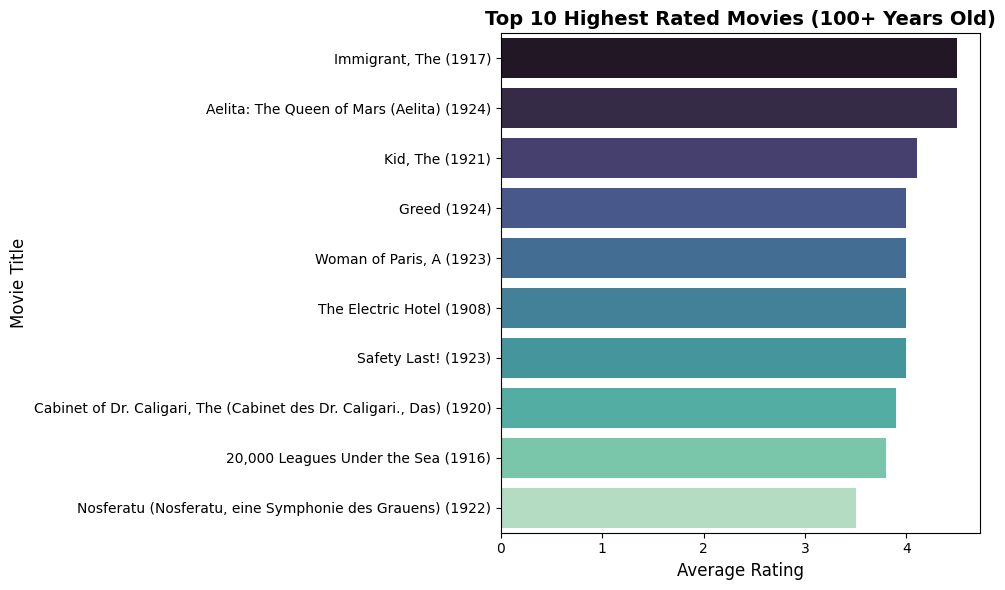

,title,avg_movie_rating
16509,"Immigrant, The (1917)",4.5
56785,Aelita: The Queen of Mars (Aelita) (1924),4.5
16332,"Kid, The (1921)",4.1
74985,Greed (1924),4.0
74120,"Woman of Paris, A (1923)",4.0
13996,The Electric Hotel (1908),4.0
7240,Safety Last! (1923),4.0
20856,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",3.9
18348,"20,000 Leagues Under the Sea (1916)",3.8
91,"Nosferatu (Nosferatu, eine Symphonie des Graue...",3.5


In [ ]:
#top 10 highest rated movies that are over 100 years old
top_old_movies = (df[df['movie_age'] > 100][['title', 'avg_movie_rating']].drop_duplicates(subset='title')
.sort_values(by='avg_movie_rating', ascending=False).head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_old_movies, x='avg_movie_rating', y='title', palette='mako')
plt.title('Top 10 Highest Rated Movies (100+ Years Old)', fontsize=14, weight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.tight_layout()
plt.show()

top_old_movies


/tmp/ipython-input-3955752019.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_recent_multi, x='avg_movie_rating', y='title', palette='viridis')


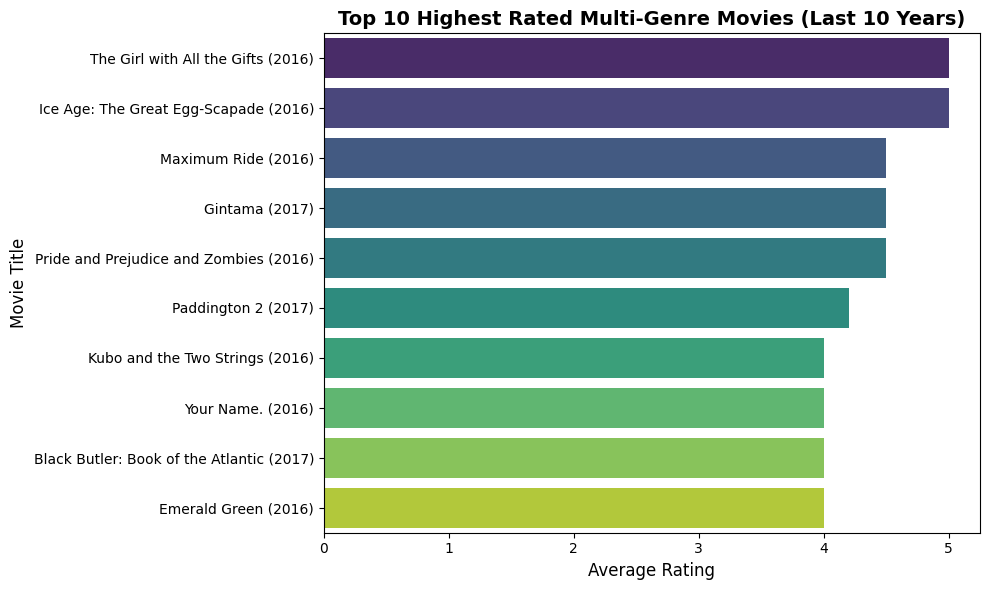

,title,avg_movie_rating
84092,The Girl with All the Gifts (2016),5.0
14029,Ice Age: The Great Egg-Scapade (2016),5.0
14041,Maximum Ride (2016),4.5
27250,Gintama (2017),4.5
19536,Pride and Prejudice and Zombies (2016),4.5
27240,Paddington 2 (2017),4.2
19569,Kubo and the Two Strings (2016),4.0
16902,Your Name. (2016),4.0
27256,Black Butler: Book of the Atlantic (2017),4.0
30175,Emerald Green (2016),4.0


In [ ]:
#top 10 highest rated movies released in the last 10 years with more than 3 genres)
recent_multi_genre = df[(df['movie_age'] <= 10) & (df['num_genres'] > 3)]
top_recent_multi = (recent_multi_genre[['title', 'avg_movie_rating']].drop_duplicates(subset='title')
.sort_values(by='avg_movie_rating', ascending=False).head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_recent_multi, x='avg_movie_rating', y='title', palette='viridis')
plt.title('Top 10 Highest Rated Multi-Genre Movies (Last 10 Years)', fontsize=14, weight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.tight_layout()
plt.show()

top_recent_multi


/tmp/ipython-input-4031943378.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres_latest, x='avg_movie_rating', y='main_genre', palette='viridis')


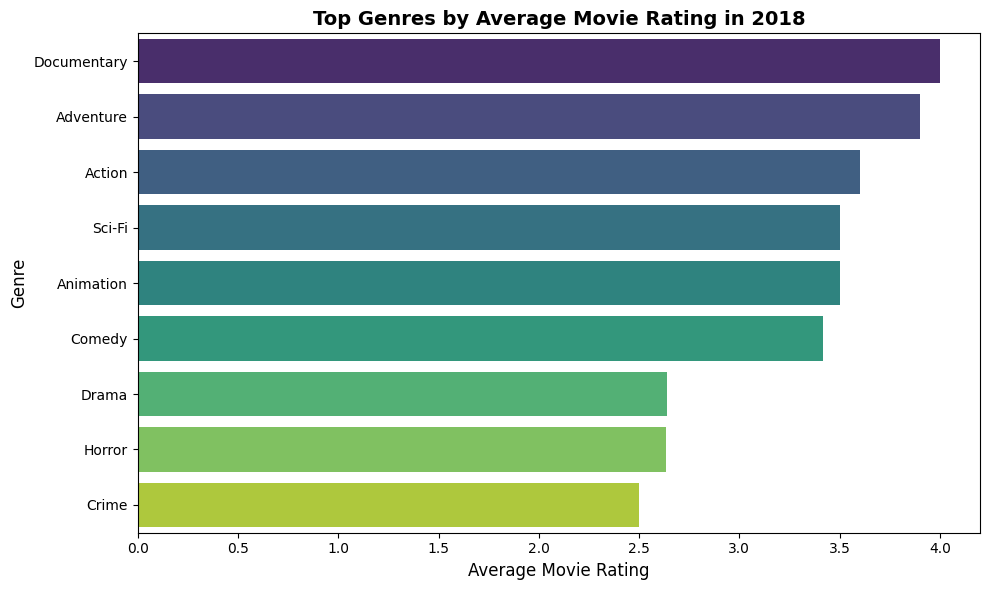

,main_genre,avg_movie_rating
0,Documentary,4.000000
1,Adventure,3.900000
2,Action,3.601852
3,Sci-Fi,3.500000
4,Animation,3.500000
5,Comedy,3.415385
6,Drama,2.640000
7,Horror,2.633333
8,Crime,2.500000


In [ ]:
#top genre with highest average rating in the latest year
latest_year = df['release_year'].max()
latest_year_df = df[df['release_year'] == latest_year]
top_genres_latest = (latest_year_df.groupby('main_genre')['avg_movie_rating'].mean()
.sort_values(ascending=False).head(10).reset_index())


plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres_latest, x='avg_movie_rating', y='main_genre', palette='viridis')
plt.title(f'Top Genres by Average Movie Rating in {int(latest_year)}', fontsize=14, weight='bold')
plt.xlabel('Average Movie Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

top_genres_latest


In [ ]:
#to save and download the cleaned dataset
df.to_csv('cleaned_movielens.csv', index=False)

from google.colab import files
files.download('cleaned_movielens.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!jupyter nbconvert --to pdf HNGstage1.ipynb

[NbConvertApp] WARNING | pattern 'HNGstage1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    E

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HNGstage1.ipynb to HNGstage1.ipynb


In [ ]:
!jupyter nbconvert --to pdf HNGstage1.ipynb


[NbConvertApp] Converting notebook HNGstage1.ipynb to pdf
[NbConvertApp] Support files will be in HNGstage1_files/
[NbConvertApp] Making directory ./HNGstage1_files
[NbConvertApp] Writing 77377 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.12/dist-packages/nb

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 

In [ ]:
!jupyter nbconvert --to pdf HNGstage1.ipynb


[NbConvertApp] Converting notebook HNGstage1.ipynb to pdf
[NbConvertApp] Support files will be in HNGstage1_files/
[NbConvertApp] Making directory ./HNGstage1_files
[NbConvertApp] Writing 77377 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 290336 bytes to HNGstage1.pdf
